In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_url = "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv"

## Load the Dataset

In [3]:
df = pd.read_csv(data_url, sep=",")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## Let's find correlations within the data

In [4]:
corr =df.corr(method = 'pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


## Let's plot them nicely

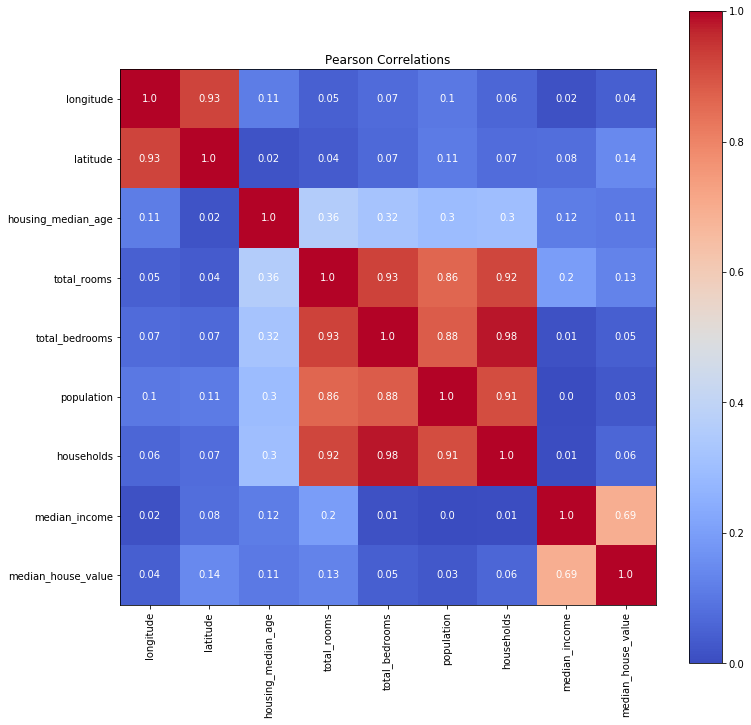

In [5]:
plt.figure(figsize = (12, 12))
plt.imshow(np.abs(corr), cmap = 'coolwarm', vmin = 0, vmax = 1)
plt.colorbar()
ticks = np.arange(0, len(corr), 1)
plt.xticks(ticks, labels = corr.columns, rotation = 90)
plt.yticks(ticks, labels = corr.columns)

for i in ticks:
    for j in ticks:
        plt.text(i, j, np.round(np.abs(corr.iloc[i, j]), 2), ha = 'center', va = 'center', color = 'w')
plt.title('Pearson Correlations');

# Let's do households vs total rooms

In [6]:
x = df.households.values.reshape(-1, 1)
y = df.total_rooms.values.reshape(-1,1)

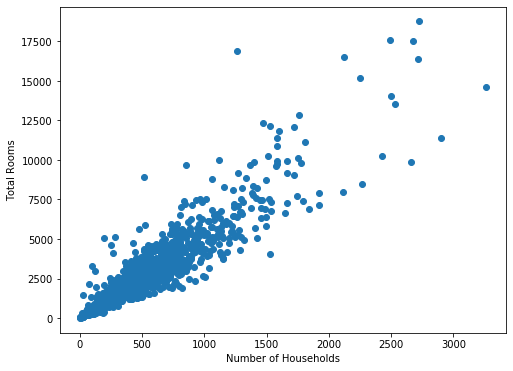

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(x[::10], y[::10])
plt.xlabel('Number of Households')
plt.ylabel('Total Rooms');

## Say that you would like to estimate the amount of rooms based on the households?

## Let's learn from data by using linear regression, with the following model

$$h(x) = x w + b$$

## Make a function that initializes parameters w and b, and returns them in a dictionary

In [8]:
def get_params():
    params = {
    'W':np.random.randn(*(1, 1)),
    'b':np.zeros((1,1))
    }
    return params

## Make a function that builds your model, using your input and parameters

In [9]:
def model(inp, params):
    z = np.dot(inp, params['W']) + params['b']
    return z

## The cost function is as follows

$$J = \frac{1}{2M}\sum_{} (h(x) - y)^2 $$

In [10]:
def get_cost(inp, params):
    return np.mean((model(inp, params) - y)**2)/2

## We decrease this cost function by gradient descent
### To make things easier

$$ \delta = h(x) - y $$

$$J = \frac{1}{2M}\sum_{} (\delta)^2 $$

## The derivatives are as follow

## With chain rule

$$\frac{\partial J}{\partial W} = \frac{1}{M} \sum_{} \delta \frac{\partial \delta}{\partial W}$$

$$ \frac{\partial \delta}{\partial W} = x $$

$$\frac{\partial J}{\partial W} = \frac{1}{M}\sum_{} \delta x $$

## Vectorizing we get

$$dW=\frac{\partial J}{\partial W} = \frac{1}{M}X^T \delta $$

## Similarly for B, since dJ/db is 1

$$db = \frac{\partial J}{\partial b} = \frac{1}{M}\sum_{} \delta $$

## We will update the models this way, where alpha is our learning rate

$$W=W - \alpha dW $$

$$b=b - \alpha db $$

## Let's make a dictionary to store our gradients

In [24]:
def grads_dict(params):
    grad_dict = dict()
    for key in params.keys():
        grad_dict['d' + key] = np.zeros(params[key].shape)
    return grad_dict

In [ ]:
def 

## Here we are going to train the model

In [19]:
def train(x, y, epochs = 1000, lr= 1e-3):
    
    costs = []
    params= get_params()
    grads = get_grads(params)
    
    for epoch in range(epochs):
        
        prediction = model(x, params)
        
        
        cost = get_cost(x, params)
        
        delta = (prediction-y)
        grads['dW'] = np.dot(x.T, delta)/y.shape[0]
        grads['db'] = np.sum(delta, axis = 0, keepdims = True)/y.shape[0]
        
        for key in params.keys():
             params[key]-= lr* grads['d' + key]
        
        if epoch%100 == 0:
            print('Cost at epoch ' + str(epoch), cost)
        
        if epoch%5 == 0:
            costs.append(cost)
    
    return costs, params

In [20]:
costs, params = train(x, y, lr= 1e-8)

Cost at epoch 0 5682837.844215817
Cost at epoch 100 2757516.844851605
Cost at epoch 200 1442743.74953216
Cost at epoch 300 851824.5674397011
Cost at epoch 400 586238.4514287491
Cost at epoch 500 466871.899824297
Cost at epoch 600 413223.1102436771
Cost at epoch 700 389110.88960956194
Cost at epoch 800 378273.754405401
Cost at epoch 900 373403.04994990764


## Let's see how the cost decreased

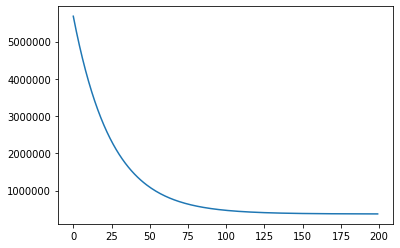

In [21]:
plt.plot(costs);

## Let's use our model to make some predicions

In [22]:
prediction = model(x, params)

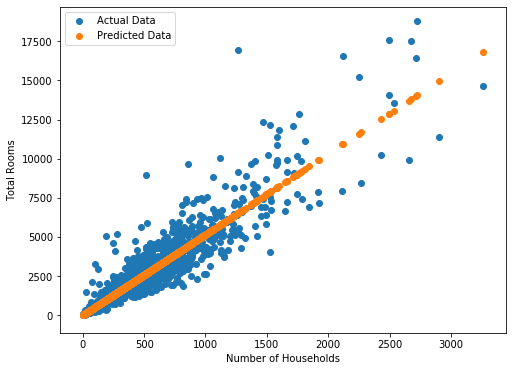

In [23]:
plt.figure(figsize = (8, 6))
plt.scatter(x[::10], y[::10], label = 'Actual Data')
plt.scatter(x[::10], prediction[::10], label = 'Predicted Data')
plt.legend()
plt.xlabel('Number of Households')
plt.ylabel('Total Rooms');

In [17]:
params

{'W': array([[5.14645785]]), 'b': array([[0.00712151]])}

## As seen, the predicted model fits well with the data, we will use the same algorithm for more complicated models later on.

## Is not magic, is just machine learning